# **K Means Clustering**

K-Means is one of the simplest and most widely used clustering algorithms in unsupervised learning. It is used to partition a dataset into K distinct clusters based on their features. Unlike supervised learning, where we have labeled data, clustering attempts to group data points into similar groups without prior labels.



* Cluster Assignment: Assign each data point to the closest cluster centroid.
* Centroid Update: Update the cluster centroids to be the mean of the data points assigned to them. <br>
These steps repeat until the centroids stabilize (i.e., they don’t change significantly) or a maximum number of iterations is reached.

K-Means minimizes the Within-Cluster Sum of Squares (WCSS), also known as the inertia:

**Challenges and Limitations** <br>

Choosing 
K: The number of clusters 
K must be chosen beforehand.
Methods like the elbow method or silhouette score can help determine the optimal 
K. <br>

Random Initialization:Poor initialization can lead to suboptimal solutions.
Use K-Means++ initialization to improve the chances of convergence to a better solution. <br>

Sensitive to Outliers: Outliers can skew the centroids since K-Means uses the mean to update centroids. <br>

Non-Spherical Clusters:K-Means assumes clusters are roughly spherical and of similar size. If clusters are elongated or vary significantly in size, K-Means may not perform well.

Advantage
* Simple and Fast: It’s computationally efficient and easy to understand.
* Scalable: Works well for large datasets.
* General Purpose: Can be applied to a wide range of problems.


When to stop?
* Centroids Converge: The centroids do not move significantly between iterations.
* Maximum Iterations: The algorithm reaches the predefined maximum number of iterations.
* Change in Inertia: The decrease in inertia (sum of squared distances) between iterations is below a threshold.


## Scratch Implementation

* Create class K-mean
* Create constructor with parameter K(no of clusters) and initalize clusters and lables
* Input train_data as X using fit method
* Find labels with respect to cluster for each data point
* repeat until find best cluster

In [18]:
import numpy as np

In [19]:
a = np.array([[1,2,3,4],[4,5,6,5],[4,57,0,1]])
b = np.array([[4,5,6,2],[6,7,8,4],[7,79,0,4],[3,4,5,2]])
a = a[:,np.newaxis,:]
d = a - b

In [20]:
d.shape

(3, 4, 4)

In [21]:
d

array([[[ -3,  -3,  -3,   2],
        [ -5,  -5,  -5,   0],
        [ -6, -77,   3,   0],
        [ -2,  -2,  -2,   2]],

       [[  0,   0,   0,   3],
        [ -2,  -2,  -2,   1],
        [ -3, -74,   6,   1],
        [  1,   1,   1,   3]],

       [[  0,  52,  -6,  -1],
        [ -2,  50,  -8,  -3],
        [ -3, -22,   0,  -3],
        [  1,  53,  -5,  -1]]])

In [22]:
d.sum(axis=2)

array([[ -7, -15, -80,  -4],
       [  3,  -5, -70,   6],
       [ 45,  37, -28,  48]])

In [23]:
d.sum(axis=2).argmax(axis=0)

array([2, 2, 2, 2], dtype=int64)

In [24]:
d[0,:,:]

array([[ -3,  -3,  -3,   2],
       [ -5,  -5,  -5,   0],
       [ -6, -77,   3,   0],
       [ -2,  -2,  -2,   2]])

In [25]:
d[:,0,:]

array([[-3, -3, -3,  2],
       [ 0,  0,  0,  3],
       [ 0, 52, -6, -1]])

In [26]:
d[:,:,0]

array([[-3, -5, -6, -2],
       [ 0, -2, -3,  1],
       [ 0, -2, -3,  1]])

In [27]:
d.argmax(axis=2)

array([[3, 3, 2, 3],
       [3, 3, 2, 3],
       [1, 1, 2, 1]], dtype=int64)

## Inbuilt method

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [29]:
X,y = make_blobs(n_features=4,n_samples=1000)

In [30]:
X,y

(array([[ 9.27966557, -9.85553479, -8.51395807,  6.68504416],
        [ 9.91677848,  3.31632275,  6.18799175, -8.2829507 ],
        [ 6.08213812,  3.73214675,  5.92148299, -8.94252636],
        ...,
        [ 7.15842988,  2.26403378,  7.20107541, -9.43033147],
        [ 8.7819988 , -9.89408866, -9.86062536,  5.83241458],
        [ 5.35573041,  2.65377422,  5.73442109, -8.98513649]]),
 array([1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2,
        1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 0,
        0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1,
        0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0,
        2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0,
        2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2,
        1, 2, 1, 2, 2

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
wcci = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i,n_init='auto')
    kmean.fit(X_train)
    wcci.append(kmean.inertia_)

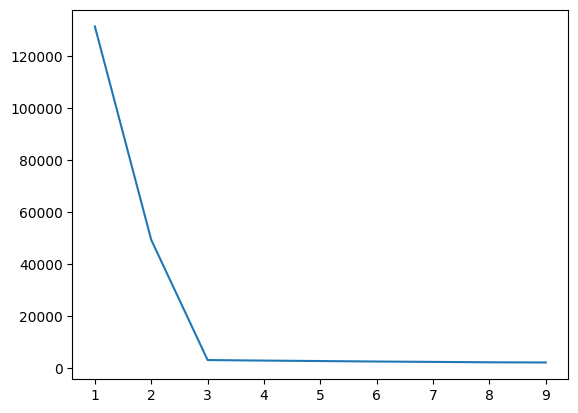

In [36]:
plt.plot(range(1,10),wcci)

From this plot we can conclude that 3 is the best no of cluster.

In [37]:
kmean = KMeans(n_clusters=3,n_init='auto')
kmean.fit(X_train)

KMeans(n_clusters=3, n_init='auto')

In [ ]:
silhouette_score()